In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.optimize as si
import glob
import scipy.stats as st
import scipy.signal as sg
import pint as pt
import csv
u = pt.UnitRegistry()

In [2]:
files0 = ['w0cal1.csv', 'w0cal2.csv', 'w0cal3.csv']

dataframes = []

for file in files0:
    df = pd.read_csv(file,header=6)
    dataframes.append(df)

w0cal = df[["AI4 (mV)"]].mean()
w0std = df[["AI4 (mV)"]].std()

files1 = ['w1cal1.csv', 'w1cal2.csv', 'w1cal3.csv']

dataframes = []

for file in files1:
    df = pd.read_csv(file,header=6)
    dataframes.append(df)

w1cal = df[["AI4 (mV)"]].mean()
w1std = df[["AI4 (mV)"]].std()


files2 = ['w2cal1.csv', 'w2cal2.csv', 'w2cal3.csv']

dataframes = []

for file in files2:
    df = pd.read_csv(file,header=6)
    dataframes.append(df)

w2cal = df[["AI4 (mV)"]].mean()
w2std = df[["AI4 (mV)"]].std()

files2 = ['w3cal1.csv', 'w3cal23.csv', 'w3cal23.csv']

dataframes = []

for file in files2:
    df = pd.read_csv(file,header=6)
    dataframes.append(df)

w3cal = df[["AI4 (mV)"]].mean()
w3std = df[["AI4 (mV)"]].std()

files4 = ['w4cal1.csv', 'w4cal2.csv', 'w4cal3.csv']

dataframes = []

for file in files4:
    df = pd.read_csv(file,header=6)
    dataframes.append(df)

w4cal = df[["AI4 (mV)"]].mean()
w4std = df[["AI4 (mV)"]].std()

files5 = ['w5cal1.csv', 'w5cal2.csv', 'w5cal3.csv']

dataframes = []

for file in files5:
    df = pd.read_csv(file,header=6)
    dataframes.append(df)

w5cal = df[["AI4 (mV)"]].mean()
w5std = df[["AI4 (mV)"]].std()

std = w1std[0],w2std[0],w3std[0],w4std[0],w5std[0]

5.697572801596365e-05 0.0008295768100885549


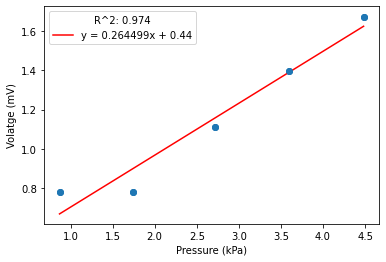

In [3]:
w0 = 0
w1 = 73.425
w2 = 73.712+73.425
w3 = 73.712+73.425+83.061
w4 = 73.712+73.425+83.061+74.187
w5 = 73.712+73.425+83.061+74.187+74.662

vol_tube = .453 * np.pi*.0025**2/4
vol_piston = np.pi*.0325**2/4 * 0.066
tot_vol=(vol_piston+vol_tube)
A = (np.pi*.0325**2)/4

print(tot_vol,A)

pressure = []

weight_data= w1,w2,w3,w4,w5

for i in range(0,5):
    weight_cfgs= weight_data[i]/1000

    gravity = 9.81

    plunger_diameter = 0.0325 

    plunger_area = np.pi * plunger_diameter**2 / 4

    pressure_data = (weight_cfgs * gravity) / plunger_area

    pressure_data = (pressure_data/1000)
    
    pressure += [pressure_data]

x=(pressure)
y=(w1cal[0],w2cal[0],w3cal[0],w4cal[0],w5cal[0])
plt.scatter(x,y)

reg = st.linregress(x,y)
slope = reg.slope
intercept = reg.intercept
r=reg.rvalue
label= 'y = {}x + {}'.format(round(slope,6),round(intercept,2))
plt.plot(x , [i*slope + intercept for i in x], label=label, color = 'r')

xerrcom = (std)
yerrcom = (std)
plt.errorbar(x,y, xerr=xerrcom, yerr=yerrcom, fmt='o')

plt.legend(title="R^2: {:.3f}".format(r))
plt.ylabel("Volatge (mV)")
plt.xlabel("Pressure (kPa)")
plt.show()

1.3298918274007403


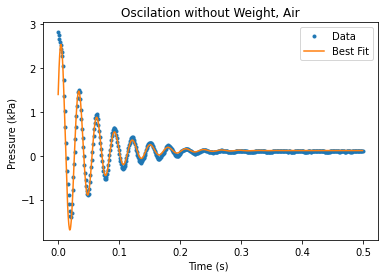

In [30]:
cali = 0.2645 * u.mV/u.psi/u.V

data_file = "w0osc.csv"

def open_file(file):
    with open(file,'r') as f:
        raw_data=list(csv.reader(f))
        f.close
    return raw_data

raw = open_file(data_file)
osc_data = np.array(raw[7:],dtype=float)

voltage = osc_data[:,1]
cor_vol = (voltage * u.mV) / (9*u.V)
p = cor_vol / cali
time = osc_data[:,0]
p= p.magnitude

start = np.argmax(p)+9
end = start + 500
analp= p[start:end]
analt= time[start:end]-time[start]

plt.plot(analt,analp,marker='.',linestyle='',label='Data')

def osc_func(t,P_0,C,k, omega ,phi):
    P = P_0 + C * np.exp(-k*t/2) * np.cos(omega*t+phi)
    return P

fitting_parameters = si.curve_fit(osc_func,analt,analp)

filler = np.linspace(analt[0],analt[-1],1000)

parameters = fitting_parameters[0]
P_0=parameters[0]*1000
C=parameters[1]
k=parameters[2]
omega=parameters[3]
phi=parameters[4]
P_0 = P_0 + 101325
m = .035
V = tot_vol
A = A

kappa = ((omega**2)+((k**2)/4))*((m*V)/(P_0*A**2))
print(kappa)

plt.plot(filler,osc_func(filler, *fitting_parameters[0]), label= 'Best Fit') 
plt.title("Oscilation without Weight, Air")
plt.xlabel('Time (s) ') 
plt.ylabel('Pressure (kPa) ')
plt.legend()
plt.show()

1.4159536921144926


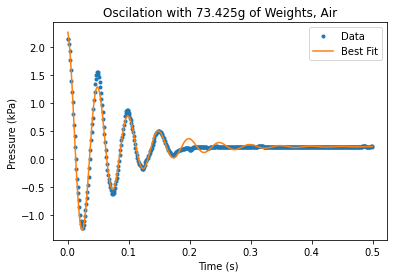

In [41]:
cali = 0.2645 * u.mV/u.psi/u.V

data_file = "w1osc.csv"

def open_file(file):
    with open(file,'r') as f:
        raw_data=list(csv.reader(f))
        f.close
    return raw_data

raw = open_file(data_file)
osc_data = np.array(raw[7:],dtype=float)

voltage = osc_data[:,1]
cor_vol = (voltage * u.mV) / (9*u.V)
p = cor_vol / cali
time = osc_data[:,0]
p= p.magnitude

start = np.argmax(p)
end = start + 500
analp= p[start:end]
analt= time[start:end]-time[start]

plt.plot(analt,analp,marker='.',linestyle='',label='Data')

def osc_func(t,P_0,C,k, omega ,phi):
    P = P_0 + C * np.exp(-k*t/2) * np.cos(omega*t+phi)
    return P

fitting_parameters = si.curve_fit(osc_func,analt,analp)

filler = np.linspace(analt[0],analt[-1],1000)

parameters = fitting_parameters[0]
P_0=parameters[0]*1000
C=parameters[1]
k=parameters[2]
omega=parameters[3]
phi=parameters[4]
P_0 = P_0 + 101325
m = .035 + w1/1000
V = tot_vol
A = A

kappa = ((omega**2)+((k**2)/4))*((m*V)/(P_0*A**2))
print(kappa)

plt.plot(filler,osc_func(filler, *fitting_parameters[0]), label= 'Best Fit') 
plt.title("Oscilation with 73.425g of Weights, Air")
plt.xlabel('Time (s) ') 
plt.ylabel('Pressure (kPa) ')
plt.legend()
plt.show()

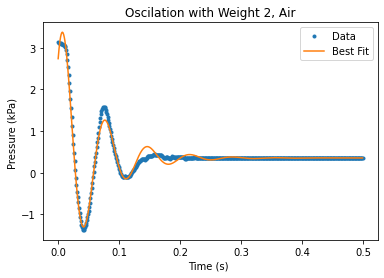

In [32]:
cali = 0.2645 * u.mV/u.psi/u.V

data_file = "w2osc.csv"

def open_file(file):
    with open(file,'r') as f:
        raw_data=list(csv.reader(f))
        f.close
    return raw_data

raw = open_file(data_file)
osc_data = np.array(raw[7:],dtype=float)

voltage = osc_data[:,1]
cor_vol = (voltage * u.mV) / (9*u.V)
p = cor_vol / cali
time = osc_data[:,0]
p= p.magnitude

start = np.argmax(p)
end = start + 500
analp= p[start:end]
analt= time[start:end]-time[start]

plt.plot(analt,analp,marker='.',linestyle='',label='Data')

def osc_func(t,P_0,C,k, omega ,phi):
    P = P_0 + C * np.exp(-k*t/2) * np.cos(omega*t+phi)
    return P

fitting_parameters = si.curve_fit(osc_func,analt,analp)

filler = np.linspace(analt[0],analt[-1],1000)

parameters = fitting_parameters[0]
P_0=parameters[0]*1000
C=parameters[1]
k=parameters[2]
omega=parameters[3]
phi=parameters[4]


plt.plot(filler,osc_func(filler, *fitting_parameters[0]), label= 'Best Fit') 
plt.title("Oscilation with Weight 2, Air")
plt.xlabel('Time (s) ') 
plt.ylabel('Pressure (kPa) ')
plt.legend()
plt.show()

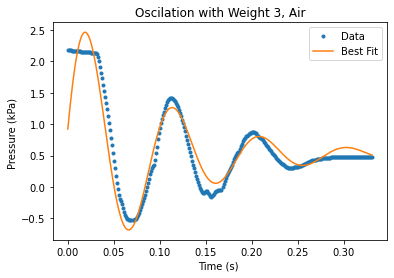

In [31]:
cali = 0.2645 * u.mV/u.psi/u.V

data_file = "w3osc.csv"

def open_file(file):
    with open(file,'r') as f:
        raw_data=list(csv.reader(f))
        f.close
    return raw_data

raw = open_file(data_file)
osc_data = np.array(raw[7:],dtype=float)

voltage = osc_data[:,1]
cor_vol = (voltage * u.mV) / (9*u.V)
p = cor_vol / cali
time = osc_data[:,0]
p= p.magnitude

start = np.argmax(p)
end = start + 500
analp= p[start:end]
analt= time[start:end]-time[start]

plt.plot(analt,analp,marker='.',linestyle='',label='Data')

def osc_func(t,P_0,C,k, omega ,phi):
    P = P_0 + C * np.exp(-k*t/2) * np.cos(omega*t+phi)
    return P

fitting_parameters = si.curve_fit(osc_func,analt,analp)

filler = np.linspace(analt[0],analt[-1],1000)

parameters = fitting_parameters[0]
P_0=parameters[0]*1000
C=parameters[1]
k=parameters[2]
omega=parameters[3]
phi=parameters[4]

plt.plot(filler,osc_func(filler, *fitting_parameters[0]), label= 'Best Fit') 
plt.title("Oscilation with Weight 3, Air")
plt.xlabel('Time (s) ') 
plt.ylabel('Pressure (kPa) ')
plt.legend()
plt.show()

In [39]:
kap_err = np.array([1.42,1.33,1.36,1.37])
error = np.std(kap_err)
print(error*2)

0.0648074069840785
